In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
import plotly.graph_objs as go
import statsmodels.formula.api as smf
from ucimlrepo import fetch_ucirepo
from scipy import stats
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.iolib.summary2 import summary_col
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

In [2]:
def Qui2(model):
    maximum = model.llf
    minimum = model.llnull
    qui2 = -2*(minimum - maximum)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [3]:
# fetch dataset 
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes) 
df = iris.data.original

In [4]:
#  Features
x = iris.data.features
X = sm.add_constant(x)

In [5]:
#  Targets
Y = iris.data.targets
le = LabelEncoder()
y = le.fit_transform(Y)

In [6]:
#  Regressão multinomial
model_0 = MNLogit(endog = y, exog = X).fit()

#Parâmetros do modelo
model_0.summary()

         Current function value: 14.124238
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  -11.86
Time:                        12:07:58   Log-Likelihood:                -2118.6
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================
         y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6397   3.04e+04  -5.39e-05      1.000   -5.97e+04    5.97e+04
sepal length     3.9005   9084.385      0.000      1.000   -1.78e+04    1.78e+04
sepal width    -10.3144   9769.912     -0.001      0.999   -1.92e+04    1.91e+04
petal length    -4.4538   9183.560     -0.000      1.000    -1.8e+04     1.8e+04
petal width      1.3109   2.39e+04   5.48e-05      1.000   -4.69e+04    4.69e+04
--------------------------------------------------------------------------------
         y=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -44.2775   2182.163     -0.020      0.984   -4321.239    4232.684
sepal length     1.4353    193.071      0.007      0.994    -376.978     379.848
sepal width    -16.9953    432.464     -0.039      0.969    -864.608     830.618
petal length     4.9756    239.562      0.021      0.983    -464.557     474.508
petal width     19.5970    251.658      0.078      0.938    -473.643     512.837
================================================================================
"""

In [7]:
pvalues = Qui2(model_0)
pvalues

#  Model has not passed

,Qui quadrado,pvalue
0,-3907.687807,1.0


In [8]:
x = X.drop(["sepal length"], axis = 1)

In [9]:
#  Regressão multinomial
model_1 = MNLogit(endog = y, exog = x).fit()

#Parâmetros do modelo
model_1.summary()

         Current function value: 0.044220
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      142
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.9597
Time:                        12:07:59   Log-Likelihood:                -6.6330
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 2.601e-65
================================================================================
         y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -28.2552   4632.237     -0.006      0.995   -9107.274    9050.763
sepal width     -2.1410   1010.390     -0.002      0.998   -1982.470    1978.188
petal length     7.9724    737.835      0.011      0.991   -1438.158    1454.103
petal width     20.5692   1718.331      0.012      0.990   -3347.297    3388.436
--------------------------------------------------------------------------------
         y=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -78.7821   4632.300     -0.017      0.986   -9157.922    9000.358
sepal width    -10.5170   1010.402     -0.010      0.992   -1990.868    1969.834
petal length    15.8469    737.845      0.021      0.983   -1430.304    1461.997
petal width     41.9988   1718.364      0.024      0.981   -3325.933    3409.931
================================================================================
"""

In [10]:
pvalues1 = Qui2(model_1)
pvalues1
#  Model passes

,Qui quadrado,pvalue
0,316.317761,9.183051e-71


In [11]:
x_2 = x.drop(["sepal width"], axis = 1)

In [12]:
#  Regressão multinomial
model_2 = MNLogit(endog = y, exog = x_2).fit()

#Parâmetros do modelo
model_2.summary()

         Current function value: 0.068545
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      144
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.9376
Time:                        12:07:59   Log-Likelihood:                -10.282
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 1.227e-65
================================================================================
         y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -73.2805   1.47e+05     -0.000      1.000   -2.88e+05    2.88e+05
petal length    20.5902   1.32e+05      0.000      1.000   -2.58e+05    2.58e+05
petal width     29.5259   2.73e+05      0.000      1.000   -5.36e+05    5.36e+05
--------------------------------------------------------------------------------
         y=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -118.5529   1.47e+05     -0.001      0.999   -2.88e+05    2.88e+05
petal length    26.3447   1.32e+05      0.000      1.000   -2.58e+05    2.58e+05
petal width     39.9726   2.73e+05      0.000      1.000   -5.36e+05    5.36e+05
================================================================================
"""

In [13]:
pvalues2 = Qui2(model_2)
pvalues2
#  Model passes

,Qui quadrado,pvalue
0,309.020178,3.570042e-69


In [14]:
#  I might want to perform a stepwise regression differently
#  Usando scikit learning
clf = LogisticRegression(random_state=0)
x_step_sk = X.drop(["const"], axis = 1)

In [15]:
step_sk = SequentialFeatureSelector(clf, k_features = 3).fit(x_step_sk, y)
step_sk.k_feature_names_

('sepal width', 'petal length', 'petal width')

In [16]:
#  Procedure follows the decisions made before
step_sk2 = SequentialFeatureSelector(clf, k_features = 2).fit(x_step_sk, y)
step_sk2.k_feature_names_

('petal length', 'petal width')

In [17]:
#  I want to compare model 1 and 2
#  AIC - Comparing models with different k's

def AIC(LLmodel, betas):
    aic = -2 * LLmodel + 2*(betas + 1)
    return aic

#  Comparing model 1 and 2
LL1 = -6.6330
betas1 =  3

LL2 = -10.282
betas2 = 2

aic1 = AIC(LL1, betas1)
aic2 = AIC(LL2, betas2)

print(f'O valor de AIC para o modelo 1 é {aic1}, para o modelo 2 é {aic2}.' )


O valor de AIC para o modelo 1 é 21.266, para o modelo 2 é 26.564.


In [18]:
#  Making predictions
#  Making a copy of df

df1 = df.copy()
df2 = df.copy()

#  model.predict() returns the probabilities

phats_1 = pd.DataFrame(model_1.predict())
phats_2 = pd.DataFrame(model_2.predict())

#  Classifying:

classification_1 = phats_1.idxmax(axis=1)
classification_2 = phats_2.idxmax(axis=1)

df1["prediction"] = classification_1
df2["prediction"] = classification_2

#  Predicted_class

df1["predicted_class"] = le.inverse_transform(classification_1)
df2["predicted_class"] = le.inverse_transform(classification_2)

display(df1)
display(df2)

,sepal length,sepal width,petal length,petal width,class,prediction,predicted_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,2,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,2,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,2,Iris-virginica


,sepal length,sepal width,petal length,petal width,class,prediction,predicted_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,2,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,2,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,2,Iris-virginica


In [19]:
#  Confusion matrix 1
table_1 = pd.pivot_table(df1,
                       index = ["predicted_class"],
                       columns = ["class"],
                       aggfunc ='size')
table_1 = table_1.fillna(0)
table_1

class,Iris-setosa,Iris-versicolor,Iris-virginica
predicted_class,,,
Iris-setosa,50.0,0.0,0.0
Iris-versicolor,0.0,48.0,1.0
Iris-virginica,0.0,2.0,49.0


In [20]:
#  Confusion matrix 2
table_2 = pd.pivot_table(df2,
                        index = ["predicted_class"],
                        columns = ["class"],
                        aggfunc = 'size')
table_2 = table_2.fillna(0)
table_2

class,Iris-setosa,Iris-versicolor,Iris-virginica
predicted_class,,,
Iris-setosa,50.0,0.0,0.0
Iris-versicolor,0.0,47.0,3.0
Iris-virginica,0.0,3.0,47.0


In [21]:
#  Accuracy
table_1 = table_1.to_numpy()
table_2 = table_2.to_numpy()

accuracy_1 = table_1.diagonal().sum()/table_1.sum()  #  Accuracy = predicted correctly / total
accuracy_2 = table_2.diagonal().sum()/table_2.sum()

print(f'Model 1 accuracy: {accuracy_1}. Model 2 accuracy: {accuracy_2}.')

Model 1 accuracy: 0.98. Model 2 accuracy: 0.96.


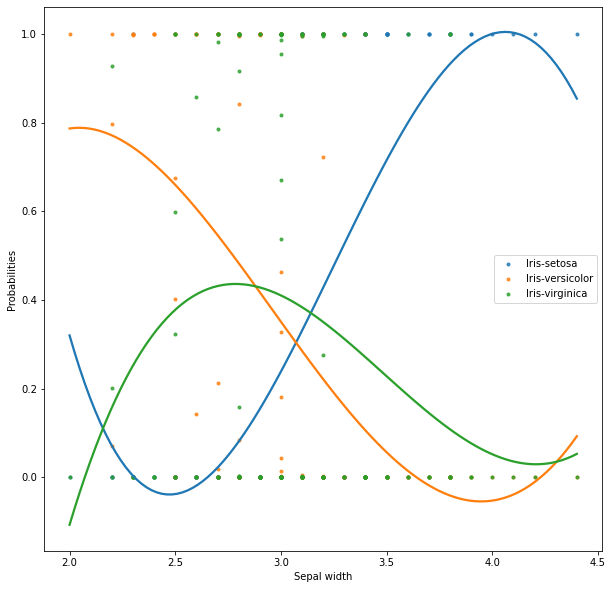

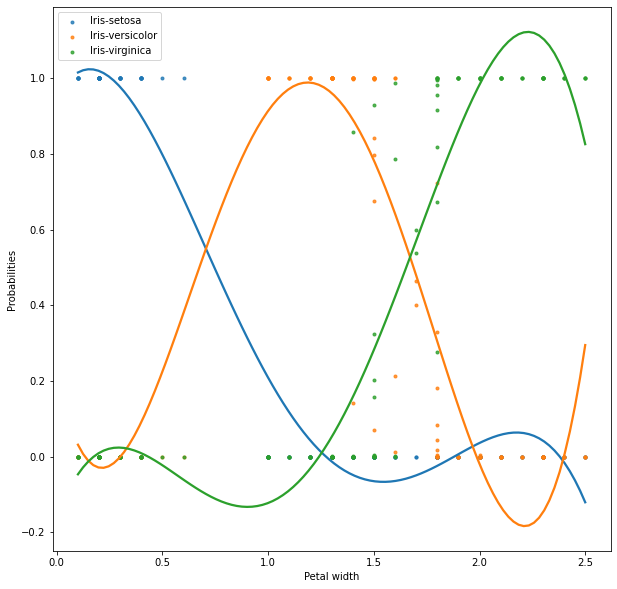

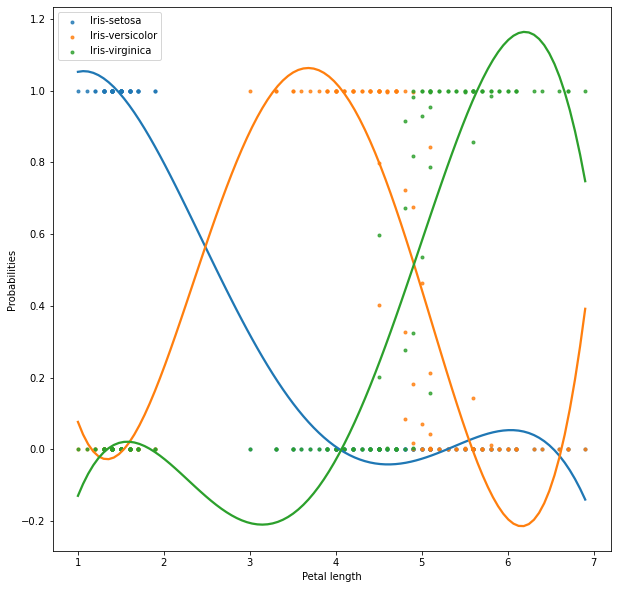

In [22]:
#  Probabilistic distribution for model 1

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df1['sepal width'],
            phats_1[0],
            ci = False, ax = ax,
            label ='Iris-setosa', order = 4, marker = ".")
sns.regplot(df1['sepal width'],
            phats_1[1],
            ci = False, ax = ax,
            label = 'Iris-versicolor', order = 4, marker = ".")
sns.regplot(df1['sepal width'],
            phats_1[2],
            ci = False, ax=ax,
            label = 'Iris-virginica', order = 4, marker = ".")
ax.set(ylabel = 'Probabilities', xlabel = 'Sepal width')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df1['petal width'],
            phats_1[0],
            ci = False, ax = ax,
            label='Iris-setosa', order = 4, marker = ".")
sns.regplot(df1['petal width'],
            phats_1[1],
            ci = False, ax = ax,
            label = 'Iris-versicolor', order = 4, marker = ".")
sns.regplot(df1['petal width'],
            phats_1[2],
            ci = False, ax=ax,
            label = 'Iris-virginica', order = 4, marker = ".")
ax.set(ylabel='Probabilities', xlabel = 'Petal width')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df1['petal length'],
            phats_1[0],
            ci = False, ax = ax,
            label ='Iris-setosa', order = 4, marker = ".")
sns.regplot(df1['petal length'],
            phats_1[1],
            ci = False, ax = ax,
            label = 'Iris-versicolor', order = 4, marker = ".")
sns.regplot(df1['petal length'],
            phats_1[2],
            ci = False, ax=ax,
            label = 'Iris-virginica', order = 4, marker = ".")
ax.set(ylabel='Probabilities', xlabel = 'Petal length')
ax.legend()

plt.show()

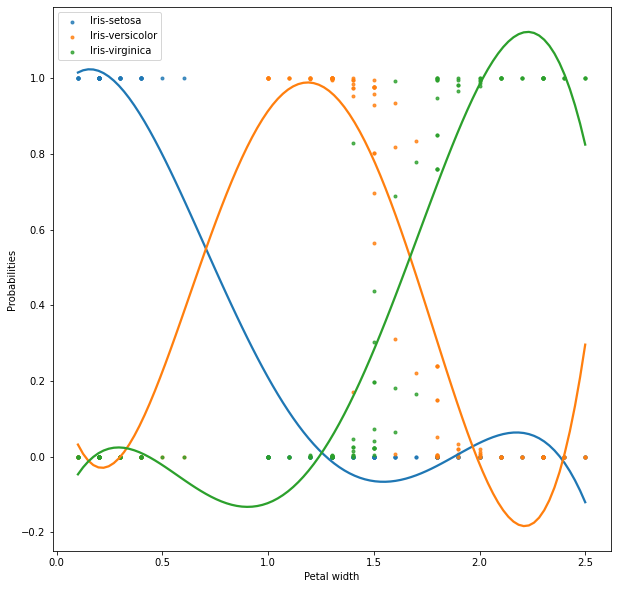

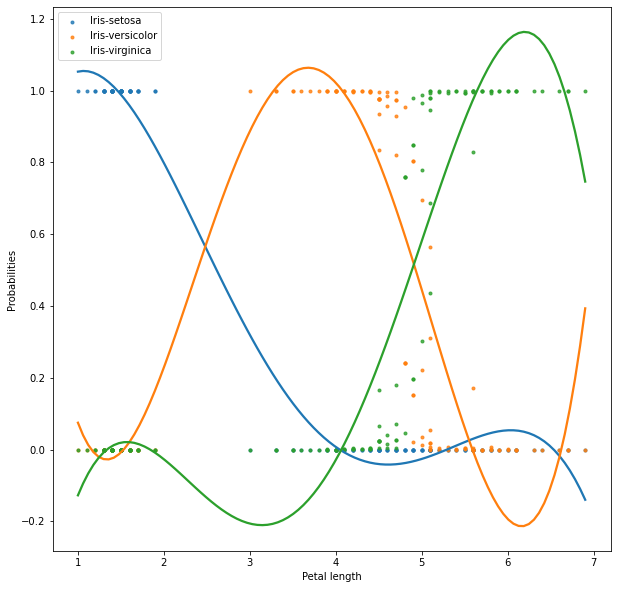

In [23]:
#  Probabilistic distribution for model 2

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df2['petal width'],
            phats_2[0],
            ci = False, ax = ax,
            label ='Iris-setosa', order = 4, marker = ".")
sns.regplot(df2['petal width'],
            phats_2[1],
            ci = False, ax = ax,
            label = 'Iris-versicolor', order = 4, marker = ".")
sns.regplot(df2['petal width'],
            phats_2[2],
            ci = False, ax=ax,
            label = 'Iris-virginica', order = 4, marker = ".")
ax.set(ylabel='Probabilities', xlabel = 'Petal width')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df2['petal length'],
            phats_2[0],
            ci = False, ax = ax,
            label ='Iris-setosa', order = 4, marker = ".")
sns.regplot(df2['petal length'],
            phats_2[1],
            ci = False, ax = ax,
            label = 'Iris-versicolor', order = 4, marker = ".")
sns.regplot(df2['petal length'],
            phats_2[2],
            ci = False, ax=ax,
            label = 'Iris-virginica', order = 4, marker = ".")
ax.set(ylabel='Probabilities', xlabel = 'Petal length')
ax.legend()

plt.show()

In [24]:
#  Since AIC 1 < AIC 2 || accuracy_1 > accuracy_2 || Loglike 1 > Loglike 2 || model 1 is preferred.